In [1]:
from keras.models import Sequential
#tensorflow.python.keras.models i layers
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import zipfile
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator



%matplotlib inline

Using TensorFlow backend.


In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-04-15 17:51:01--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   130MB/s    in 0.5s    

2019-04-15 17:51:02 (130 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ = zipfile.ZipFile(local_zip,'r')
zip_.extractall('/tmp')
zip_.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir,'train')
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

validation_dir = os.path.join(base_dir,'validation') 
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [0]:
#pokazuje sciezke i nazwe pliku

def plot_images(item_dir, top=25):
  all_item_dirs = os.listdir(item_dir)
  item_files = [os.path.join(item_dir,file) for file in all_item_dirs][:top]
  
  plt.figure(figsize=(10,10))  
  for idx, img_path in enumerate(item_files):
      plt.subplot(5,5,idx+1)
      img = mpimg.imread (img_path)
      plt.imshow(img)
  plt.tight_layout()    



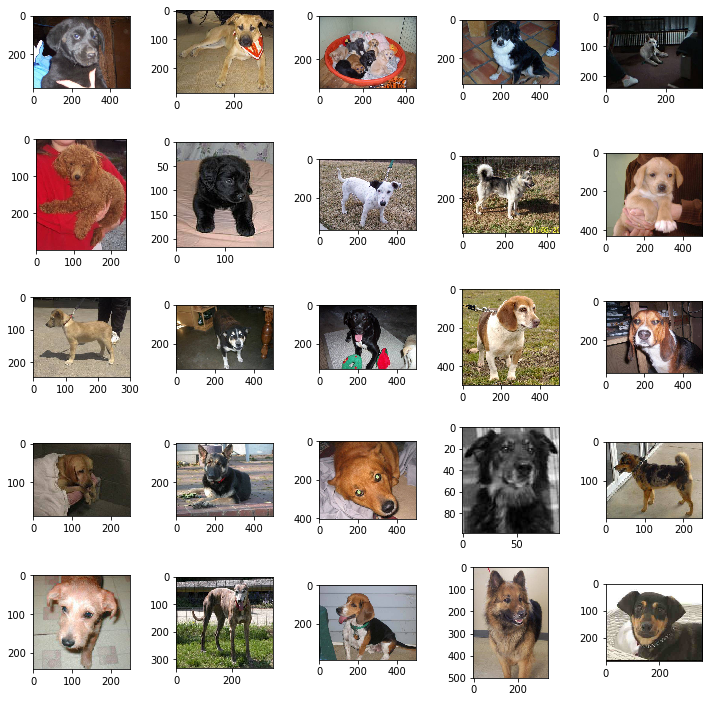

In [41]:
#all_dog_files = os.listdir(train_dogs_dir)
#dogs_files = [os.path.join(train_cats_dir,file) for file in all_dog_files][:25]
plot_images(train_dogs_dir)


In [45]:
input_shape = (150,150,3)
model = Sequential([
    Conv2D(32,(3,3),input_shape=input_shape),
    MaxPool2D((2,2)),
    
    Conv2D(64,(3,3)),
    MaxPool2D((2,2)),
    
    Flatten(),
    
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                5308480   
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
__________

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
#normalizacja

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'  # binary - dwie klasy kot/pies
    )

validation_generator = test_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'  
    )

NameError: ignored